In [32]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.utils.data as data_utils
import math
import torchvision.models as models
from PIL import Image
from deepfool.deepfool import deepfool, local_deepfool, deepfool_specific
import os
import copy


from utils import diff, plot_diff, plot_comparaison, make_examples




In [33]:
import random

NUM_CLASSES = 100
MAX_ITER = 100
OVERSHOOT = 0.02
TARGET_CLASS = 413

# Set seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [34]:
# region_mask = np.zeros((224, 224), dtype=np.int32)
# region_mask[50:150, 50:150] = 1


# plt.imshow((region_mask))
# plt.imshow(region_mask, cmap="gray")
# plt.show()

# region_mask = None

In [35]:
try :
    train_set = torchvision.datasets.Imagenette(root="./dataset", split="train")
    val_set = torchvision.datasets.Imagenette(root="./dataset", split="val")
except :
    print("Error while downloading the dataset")

Dataset Imagenette
    Number of datapoints: 9469
    Root location: ./dataset
Dataset Imagenette
    Number of datapoints: 3925
    Root location: ./dataset
Number of training samples: 9469
Classes in training set: [('tench', 'Tinca tinca'), ('English springer', 'English springer spaniel'), ('cassette player',), ('chain saw', 'chainsaw'), ('church', 'church building'), ('French horn', 'horn'), ('garbage truck', 'dustcart'), ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'), ('golf ball',), ('parachute', 'chute')]
Number of validation samples: 3925
Classes in validation set: [('tench', 'Tinca tinca'), ('English springer', 'English springer spaniel'), ('cassette player',), ('chain saw', 'chainsaw'), ('church', 'church building'), ('French horn', 'horn'), ('garbage truck', 'dustcart'), ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'), ('golf ball',), ('parachute', 'chute')]


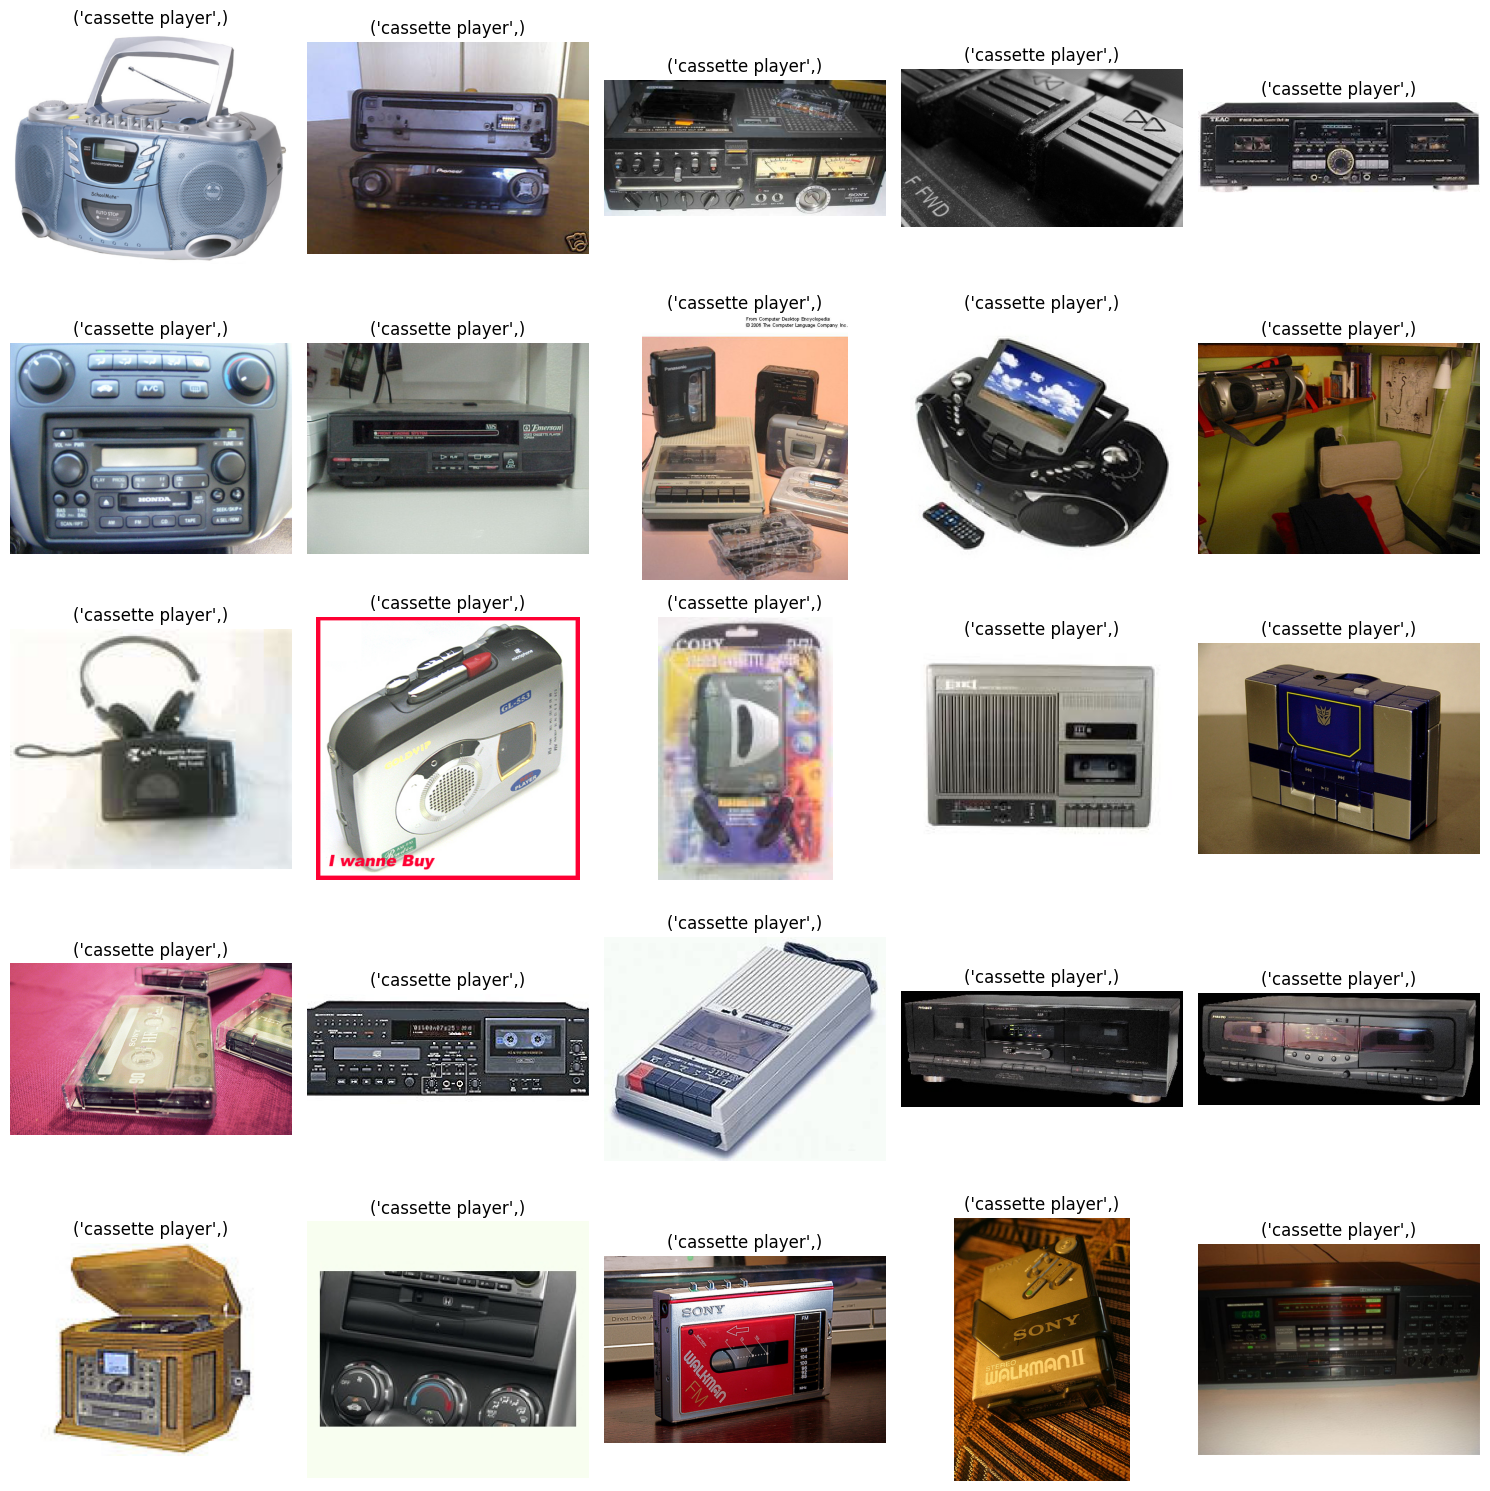

In [36]:
print(train_set)
print(val_set)

# Explore the train_set
print(f"Number of training samples: {len(train_set)}")
print(f"Classes in training set: {train_set.classes}")

# Explore the val_set
print(f"Number of validation samples: {len(val_set)}")
print(f"Classes in validation set: {val_set.classes}")

# Display 5 images of 5 classes each class in one column
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for i in range(25):
    img, label = train_set[i+2000]
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(train_set.classes[label])
plt.tight_layout()
plt.show()
